<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-DataSet" data-toc-modified-id="Loading-DataSet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading DataSet</a></span></li><li><span><a href="#DataSet-Analysis" data-toc-modified-id="DataSet-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DataSet Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Filtering" data-toc-modified-id="Data-Filtering-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Filtering</a></span></li><li><span><a href="#Removing-Duplicate-Data" data-toc-modified-id="Removing-Duplicate-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Removing Duplicate Data</a></span></li><li><span><a href="#Seperating-Catagorical-Data-and-Numerical-Data" data-toc-modified-id="Seperating-Catagorical-Data-and-Numerical-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Seperating Catagorical Data and Numerical Data</a></span></li><li><span><a href="#Removing-Null-Values" data-toc-modified-id="Removing-Null-Values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Removing Null Values</a></span></li><li><span><a href="#Label-Encoding" data-toc-modified-id="Label-Encoding-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Label Encoding</a></span></li></ul></li><li><span><a href="#Training-And-Testing" data-toc-modified-id="Training-And-Testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training And Testing</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#GridSearch-Cross-Validation-using-decision-tree" data-toc-modified-id="GridSearch-Cross-Validation-using-decision-tree-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>GridSearch Cross-Validation using decision tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#AUC-and-ROC-Curve" data-toc-modified-id="AUC-and-ROC-Curve-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>AUC and ROC Curve</a></span><ul class="toc-item"><li><span><a href="#Auc-Roc-Curve-in-Decision-Tree" data-toc-modified-id="Auc-Roc-Curve-in-Decision-Tree-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Auc-Roc Curve in Decision Tree</a></span></li><li><span><a href="#Auc-Roc-Curve-in-Random-Forest" data-toc-modified-id="Auc-Roc-Curve-in-Random-Forest-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Auc-Roc Curve in Random Forest</a></span></li></ul></li></ul></div>

In [70]:
import seaborn as snb
import pandas as pd
import matplotlib.pyplot as plt

# Loading DataSet

In [2]:
df = pd.read_csv('dataset_diabetes_diabetic_data.csv')
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


# DataSet Analysis

In [3]:
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

In [51]:
for col in df.columns:
    print(col,":",df[col].nunique())

race : 5
gender : 3
age : 10
admission_type_id : 8
discharge_disposition_id : 26
admission_source_id : 13
time_in_hospital : 14
num_lab_procedures : 116
num_procedures : 7
num_medications : 74
number_outpatient : 29
number_emergency : 19
number_inpatient : 21
number_diagnoses : 16
change : 2
diabatic : 2


In [5]:
df.drop('patient_nbr',axis='columns',inplace=True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


In [6]:
df[df['diag_1']=='?']['diag_1'].count()

19

In [7]:
df[df['diag_2']=='?']['diag_2'].count()

304

In [8]:
df[df['diag_3']=='?']['diag_3'].count()

1237

In [9]:
for i in df.columns:
    if (df[df[i]=='?'][i].count())>0:
        print(i,":",df[df[i]=='?'][i].count())

race : 1461
diag_1 : 19
diag_2 : 304
diag_3 : 1237


In [10]:
count=0
for i,row in df.iterrows():
    if(row['race']=='?')&(row['diag_1']=='?')&(row['diag_2']=='?')&(row['diag_3']=='?'):
        count+=1
print(count)

0


## Data Filtering

In [11]:
df.drop(['diag_1','diag_2','diag_3'],axis='columns',inplace=True)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,Ch,Yes


In [12]:
df.shape[0]

70180

## Removing Duplicate Data

In [13]:
df.drop_duplicates(keep = "first",inplace = True)

In [14]:
df.shape[0]

70158

## Seperating Catagorical Data and Numerical Data

In [15]:
df_cat = pd.DataFrame()
df_num = pd.DataFrame()

In [16]:
for i in df.columns:
    if df[i].dtype == object:
        df_cat[i] = df[i]
    else:
        df_num[i] = df[i]

In [17]:
df_cat.head()

,race,gender,age,change,diabatic
0,Caucasian,Female,[0-10),No,No
1,Caucasian,Female,[10-20),Ch,Yes
2,AfricanAmerican,Female,[20-30),No,Yes
3,Caucasian,Male,[30-40),Ch,Yes
4,Caucasian,Male,[40-50),Ch,Yes


In [18]:
df_num.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,6,25,1,1,41,0,1,0,0,0,1
1,1,1,7,3,59,0,18,0,0,0,9
2,1,1,7,2,11,5,13,2,0,1,6
3,1,1,7,2,44,1,16,0,0,0,7
4,1,1,7,1,51,0,8,0,0,0,5


## Removing Null Values

In [20]:
df.drop(df[df['race']=='?'].index,inplace=True)
df.shape

(68697, 16)

## Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [22]:
for i in df_cat.columns:
    df[i] = lr.fit_transform(df[i])
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,2,0,0,6,25,1,1,41,0,1,0,0,0,1,1,0
1,2,0,1,1,1,7,3,59,0,18,0,0,0,9,0,1
2,0,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1
3,2,1,3,1,1,7,2,44,1,16,0,0,0,7,0,1
4,2,1,4,1,1,7,1,51,0,8,0,0,0,5,0,1


# Training And Testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
inputs = df.drop('diabatic',axis='columns')
target = df.diabatic

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(inputs,target,test_size=0.3,random_state=10)

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [27]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [69]:
ypred = grid_search_cv.predict(xtest)

In [28]:
model.score(xtest,ytest)

0.7111596312469675

# GridSearch Cross-Validation using decision tree

In [55]:
parameter = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 10)}

<IPython.core.display.Javascript object>

In [56]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(model, parameter,cv=3)

In [57]:
grid_search_cv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

In [58]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [68]:
grid_search_cv.score(xtest,ytest)

0.7408054342552159

In [66]:
score = grid_search_cv.cv_results_
score['mean_test_score']

array([0.7247281 , 0.72824256, 0.72892882, 0.73204816, 0.73678957,
       0.7361657 , 0.73543785, 0.7247281 , 0.72822176, 0.72930314,
       0.73213135, 0.73685196, 0.73626968, 0.73529228])

<AxesSubplot:>

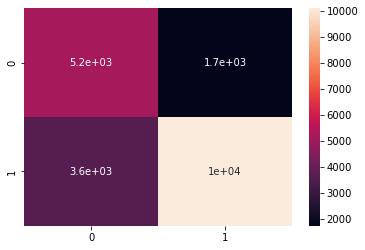

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(ytest,ypred)
snb.heatmap(cm,annot=True)

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfs = RandomForestClassifier(max_depth=2)

In [74]:
rfs.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2)

In [81]:
ypred = rfs.predict(xtest)

In [75]:
rfs.score(xtest,ytest)

0.6671033478893741

In [78]:
accuracy_score(ypred,ytest)

0.7408054342552159

In [82]:
cm = confusion_matrix(ytest,ypred)

<IPython.core.display.Javascript object>

<AxesSubplot:>

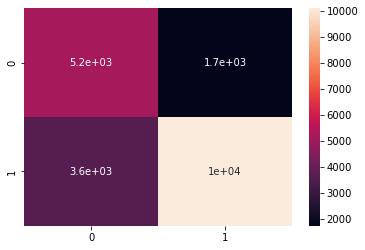

In [80]:
sns.heatmap(cm,annot=True)

# AUC and ROC Curve

## Auc-Roc Curve in Decision Tree

In [89]:
probs = grid_search_cv.predict_proba(xtest)
probs = probs[:,1]
probs

array([0.53796562, 0.32954545, 1.        , ..., 0.54597337, 0.75408497,
       0.43223443])

In [112]:
from sklearn.metrics import roc_curve,roc_auc_score

In [104]:
ind_prob = [0 for i in range(len(ytest))]
ns_auc = roc_auc_score(ytest, ind_prob)
lr_auc = roc_auc_score(ytest, probs)

In [115]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.822


In [106]:
ns_fpr, ns_tpr, _ = roc_curve(ytest, ind_prob)
lr_fpr, lr_tpr, _ = roc_curve(ytest, probs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

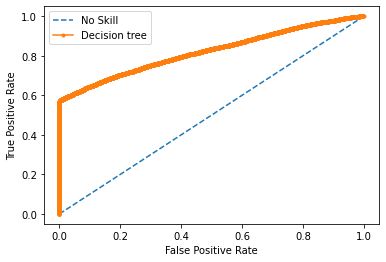

In [121]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Auc-Roc Curve in Random Forest

In [113]:
probs = rfs.predict_proba(xtest)
probs = probs[:,1]
probs

array([0.60389306, 0.51418996, 0.78254356, ..., 0.573664  , 0.60850859,
       0.55157251])

In [114]:
ind_prob = [0 for i in range(len(ytest))]
ns_auc = roc_auc_score(ytest, ind_prob)
lr_auc = roc_auc_score(ytest, probs)

In [117]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.822


In [118]:
ns_fpr, ns_tpr, _ = roc_curve(ytest, ind_prob)
lr_fpr, lr_tpr, _ = roc_curve(ytest, probs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

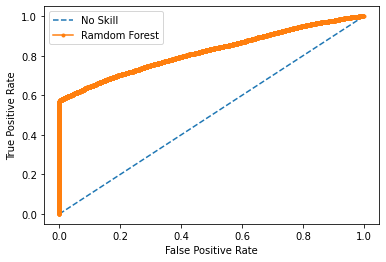

In [119]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Ramdom Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()